<a href="https://colab.research.google.com/github/EricXu1728/GoogleAIReader/blob/main/Gemini_Pro_Reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
!pip -q install google-generativeai==0.3.0
!pip -q install google-ai-generativelanguage==0.4.0
!pip install PyGithub

In [32]:
'''
import requests

def download_file_from_github(repo_owner, repo_name, file_path, branch='master'):
    base_url = f'https://raw.githubusercontent.com/{repo_owner}/{repo_name}/{branch}/{file_path}'
    response = requests.get(base_url)

    if response.status_code == 200:
        # File found, save it to your local directory or process it as needed
        with open(file_path.split("/")[-1], 'wb') as file:
            file.write(response.content)
        print(f"File '{file_path}' downloaded successfully.")
    else:
        print(f"Failed to download file '{file_path}'. Status code: {response.status_code}")

# Example usage:
repo_owner = 'onwuegbuchulem'
repo_name = 'WEB_SCRAPING_THUMBNAILS'


file_name = "1"

file_path = f'Thumbnail_mapped/Thumbnail256_mapped/01/{file_name}.jpg'

download_file_from_github(repo_owner, repo_name, file_path)

file_path = f'Documents/txt/01/{file_name}.txt'
download_file_from_github(repo_owner, repo_name, file_path)
'''


'\nimport requests\n\ndef download_file_from_github(repo_owner, repo_name, file_path, branch=\'master\'):\n    base_url = f\'https://raw.githubusercontent.com/{repo_owner}/{repo_name}/{branch}/{file_path}\'\n    response = requests.get(base_url)\n\n    if response.status_code == 200:\n        # File found, save it to your local directory or process it as needed\n        with open(file_path.split("/")[-1], \'wb\') as file:\n            file.write(response.content)\n        print(f"File \'{file_path}\' downloaded successfully.")\n    else:\n        print(f"Failed to download file \'{file_path}\'. Status code: {response.status_code}")\n\n# Example usage:\nrepo_owner = \'onwuegbuchulem\'\nrepo_name = \'WEB_SCRAPING_THUMBNAILS\'\n\n\nfile_name = "1"\n\nfile_path = f\'Thumbnail_mapped/Thumbnail256_mapped/01/{file_name}.jpg\'\n\ndownload_file_from_github(repo_owner, repo_name, file_path)\n\nfile_path = f\'Documents/txt/01/{file_name}.txt\'\ndownload_file_from_github(repo_owner, repo_name, fil

## Configuring the Model

In [33]:
# setup
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

GOOGLE_AI_STUDIO = userdata.get('GOOGLE_AI_STUDIO2')

genai.configure(api_key=GOOGLE_AI_STUDIO)

In [34]:
for m in genai.list_models():
    print(m.name)
    print(m.supported_generation_methods)


models/chat-bison-001
['generateMessage', 'countMessageTokens']
models/text-bison-001
['generateText', 'countTextTokens', 'createTunedTextModel']
models/embedding-gecko-001
['embedText', 'countTextTokens']
models/gemini-pro
['generateContent', 'countTokens']
models/gemini-pro-vision
['generateContent', 'countTokens']
models/embedding-001
['embedContent', 'countTextTokens']
models/aqa
['generateAnswer']


In [35]:

# Set up the model
generation_config = {
  "temperature": 0.,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]


model = genai.GenerativeModel(model_name="gemini-pro-vision",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


## Using Gemini Pro Vision

In [36]:
file_name = "/content/drive/MyDrive/thumbnails/technology"

In [37]:
def get_text(file_name):
  file_path = f"{file_name}.txt"
  with open(file_path, 'r') as file:

      # Read the contents of the file and save it in a variable
      return file.read()




In [38]:
import os
import PIL.Image

def get_image(name):
  if(os.path.exists(f"{name}.png")):
    return PIL.Image.open(f'{file_name}.png')
  if(os.path.exists(f"{name}.jpg")):
    return PIL.Image.open(f'{file_name}.jpg')

  print("error occured")

In [39]:
def calculate_word_accuracy(ground_truth, recognized_text):
    # Split the ground truth and recognized text into lists of words
    ground_truth_words = ground_truth.split()
    recognized_words = recognized_text.split()

    # Find the intersection of the two lists to get correctly recognized words
    correct_words = set(ground_truth_words) & set(recognized_words)

    # Calculate Word Accuracy
    word_accuracy = len(correct_words) / len(set(ground_truth_words)) * 100

    return word_accuracy

# Example usage
ground_truth_text = "the quick brown fox jumps over the lazy dog"
recognized_text = "the quick brown fox jumps over the lazy dogs"

accuracy = calculate_word_accuracy(ground_truth_text, recognized_text)
print(f"Word Accuracy: {accuracy:.2f}%")


Word Accuracy: 87.50%


In [47]:
def resize_with_aspect_ratio(image, target_width):
    # Calculate the aspect ratio
    aspect_ratio = image.width / image.height

    # Calculate the corresponding height based on the target width
    target_height = int(target_width / aspect_ratio)

    # Resize the image while maintaining the aspect ratio
    resized_image = image.resize((target_width, target_height))

    return resized_image

In [48]:
def test_recognition(file_name, image_width, show_result = False):
  img = get_image(file_name)
  file_content = get_text(file_name)

  img = resize_with_aspect_ratio(img, image_width)

  response = 0

  retries = 0
  max_retries = 3

  while(response == 0 and retries<=max_retries):
    try:
      response = model.generate_content(["Identify the words in this blurry image:", img])
      response.resolve()
    except:
      print("Error occured. Trying again")
      retries +=1

  accuracy = calculate_word_accuracy(file_content, response.text)
  width, height = img.size
  pixel_count = width*height

  if(show_result):
    display(img)
    print(response.text)

  return accuracy, pixel_count




The Technology
Chim adssa: 28
ericxu1728@terpmail.umd.edu :  16

Rapid Advances in Artificial Intelligence (22)
In the last decade, the field of artificial intelligence (AI) has experienced unprecedented growth and development. This surge can be attributed to the confluence of increased computational power, vast amounts of available data, and breakthroughs in machine learning algorithms. As a result, AI applications have permeated various aspects of our daily lives, from virtual assistants and recommendation systems to autonomous vehicles and advanced medical diagnostics.
The Rise of Sustainable Technologies (18)
As concerns about climate change and environmental sustainability intensify, the global focus has shifted towards developing and implementing green technologies. Innovations in renewable energy, energy storage, and sustainable materials are becoming increasingly crucial in the quest for a more eco-friendly future. Solar and wind power technologies, once considered niche, have 

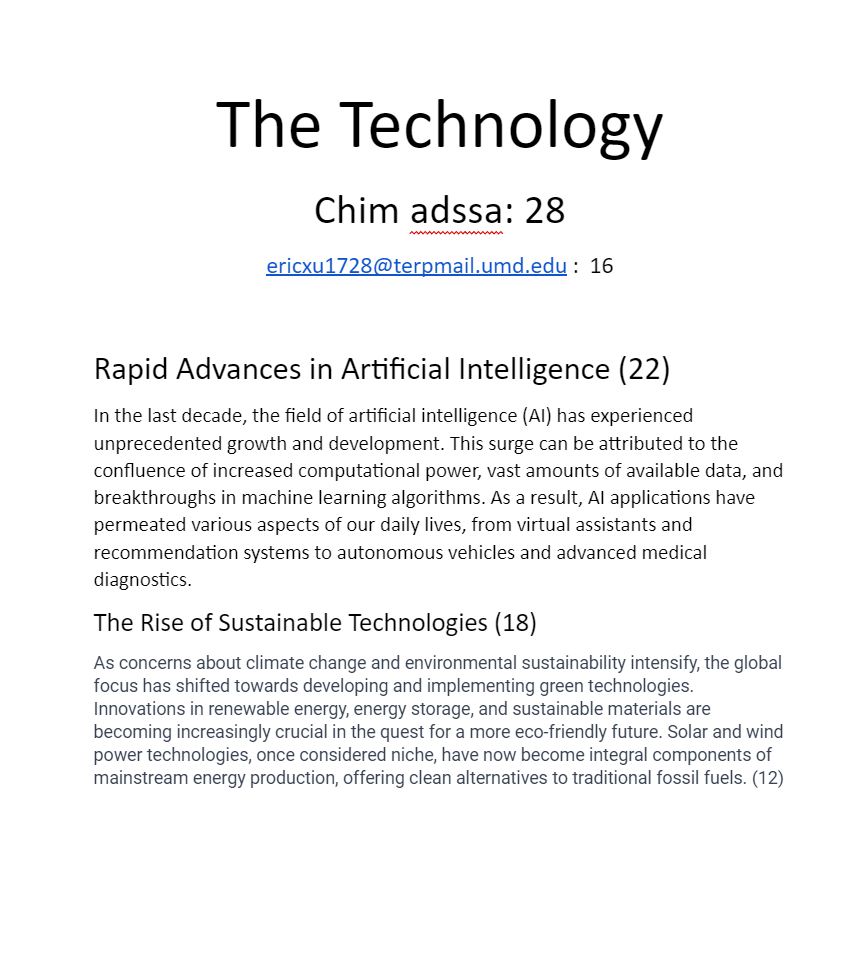

In [49]:
# Now, the variable file_content contains the content of the text file
file_content = get_text(file_name)
print(file_content)
img = get_image(file_name)
display(img)


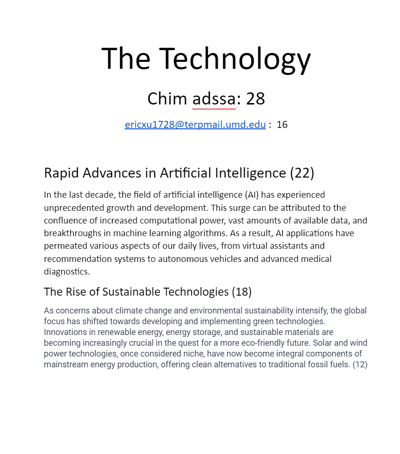

 The Technology

Chim addressa: 28

ericxu1728@terpmail.umd.edu: 16

Rapid Advances in Artificial Intelligence (22)

In the last decade, the field of artificial intelligence (AI) has experienced unprecedented growth and development. This surge can be attributed to the confluence of increased computational power, vast amounts of available data, and breakthroughs in machine learning algorithms. As a result, AI applications have permeated various aspects of our daily lives, from virtual assistants and recommendation systems to autonomous vehicles and advanced medical diagnostics.

The Rise of Sustainable Technologies (18)

As concerns about climate change and environmental sustainability intensify, the global focus has shifted towards developing and implementing green technologies. Innovations in renewable energy, energy storage, and green materials are becoming increasingly crucial in the quest for a more eco-friendly future. Solar and wind power technologies, once considered niche, have

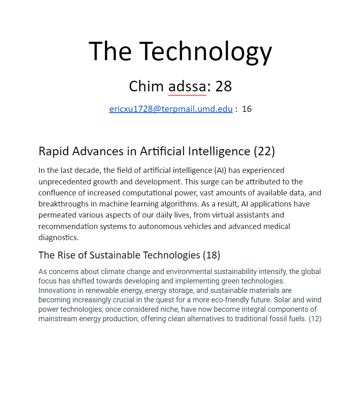

 The Technology

Chim adssa: 28

ericxu1728@terpmail.umd.edu: 16

Rapid Advances in Artificial Intelligence (22)

In the last decade, the field of artificial intelligence (AI) has experienced unprecedented growth and development. This surge can be attributed to the confluence of increased computational power, vast amounts of available data, and breakthroughs in machine learning algorithms. As a result, AI applications have permeated various aspects of our daily lives, from virtual assistants and recommendation systems to autonomous vehicles and advanced medical diagnostics.

The Rise of Sustainable Technologies (18)

As concerns about climate change and environmental sustainability intensify, the global focus has shifted towards developing and implementing green technologies. Innovations in renewable energy, energy storage, and sustainable materials are becoming increasingly crucial for a more eco-friendly future. Solar and wind power technologies, once considered niche, have now becom

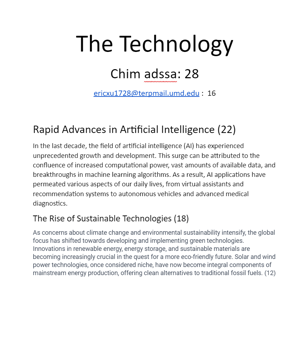

 The image is blurry, but it appears to say:

The Technology

Chim addressa: 28

ericu1728@termail.umd.edu: 16

Rapid Advances in Artificial Intelligence (22)

In the last decade, the field of Artificial Intelligence (AI) has experienced unprecedented growth and development. This surge can be attributed to the confluence of increased computational power, vast amounts of available data, and breakthroughs in machine learning algorithms. As a result, applications have permeated various aspects of our daily lives, from virtual assistants and recommendation systems to autonomous vehicles and advanced medical diagnostics.

The Rise of Sustainable Technologies (18)

As concerns about climate change and environmental sustainability intensify, the global focus has shifted towards developing and implementing green technologies. Innovations in renewable energy, energy storage, and sustainable materials are becoming increasingly crucial in the quest for a more eco-friendly future. Solar and wind p

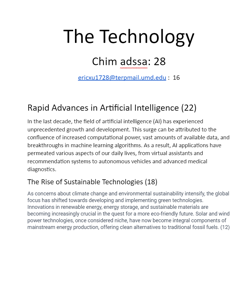

 The image is blurry, but it appears to say:

The Technology

Chim adssa: 28

Rapid Advances in Artificial Intelligence (22)

In the last decade, the field of Artificial Intelligence (AI) has experienced unprecedented growth and development. This surge can be attributed to the confluence of increased computational power, vast amounts of available data, and breakthroughs in machine learning algorithms. As a result, applications have permeated various aspects of our daily lives, from self-driving cars and recommendation systems to autonomous vehicles and advanced medical diagnostics.

The Rise of Sustainable Technologies (18)

As concerns about climate change and environmental sustainability intensify, the global focus has shifted towards developing and implementing green technologies. Innovations in renewable energy sources, such as solar panels, wind turbines, and bioenergy, have become increasingly crucial in the quest for a more eco-friendly future. Solar and wind power technologies,

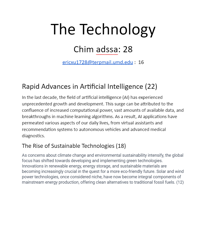

 The Technology

Chim adissa: 28

Rapid Advances in Artificial Intelligence (22)

The Rise of Sustainable Technologies (18)


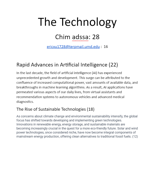

 The image is blurry, but it appears to say:

The Technology
Chim adssa: 28
Advances in Artificial Intelligence (12)
The Rise of Sustainable Technologies (16)


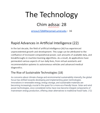

 The image is blurry, but it appears to say:

The Technology
Chim alisa 28
Rapid Advances in Artificial Intelligence (22)
Artificial intelligence (AI) is a branch of computer science that deals with the creation of intelligent agents, which are systems that can reason, learn, and act autonomously. AI has been used in a wide range of applications, including natural language processing, image recognition, robotics, and game playing.

Recent advances in AI have been driven by the availability of large datasets, powerful computing hardware, and new algorithms. These advances have led to significant improvements in the performance of AI systems. For example, in 2016, AlphaGo, a computer program developed by Google DeepMind, defeated the world's best Go player. This was a major breakthrough, as Go was previously considered to be a game that was too complex for computers to master.

The rapid advances in AI are having a major impact on a wide range of industries. For example, AI is being used

In [50]:
x = []
y=[]

largest = 400
smallest = 100
step = 50

scale = largest

while(scale>=smallest):
    ypoint, xpoint = test_recognition(file_name,scale, True)
    scale -= step
    x.append(xpoint)
    y.append(ypoint)

[181600, 138950, 102000, 70750, 45400, 25500, 11300]
[96.7741935483871, 97.58064516129032, 88.70967741935483, 79.83870967741935, 12.096774193548388, 12.096774193548388, 39.516129032258064]


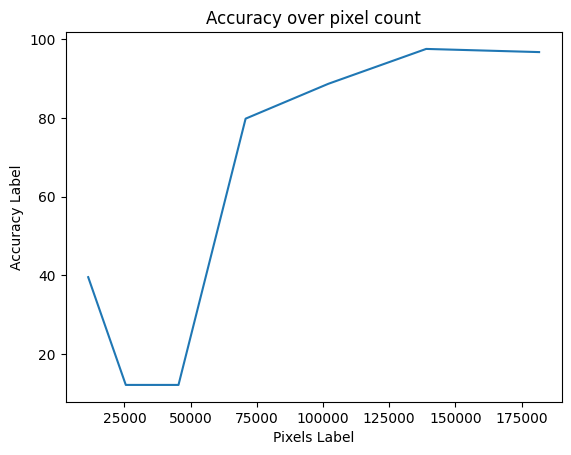

In [51]:
import matplotlib.pyplot as plt

# Sample data
print(x)
print(y)

# Create a line plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('Pixels Label')
plt.ylabel('Accuracy Label')
plt.title('Accuracy over pixel count')

# Show the plot
plt.show()
